In [1]:
import pandas as pd

# Get data from users
users = pd.read_csv('../../yelp_academic/csv_data/yelp_academic_dataset_user.csv')
users.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,NaN,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [6]:
from sklearn.decomposition import PCA
import numpy as np

# Get the features we are interested in
features = ['average_stars', 'review_count', 'useful', 'funny', 'cool', 'fans']
inputs = users[features].copy()
for feature in features[1:]:
    inputs[feature] = np.log(inputs[feature] + 1)

# Apply PCA to get user factors
factors = PCA(n_components=2, random_state=0).fit_transform(inputs)
factors[:5]

array([[13.69905694,  0.38230027],
       [17.86914304,  0.73090632],
       [11.72593929,  0.89177376],
       [ 9.2829063 , -0.15736065],
       [ 3.53338994,  0.22927293]])

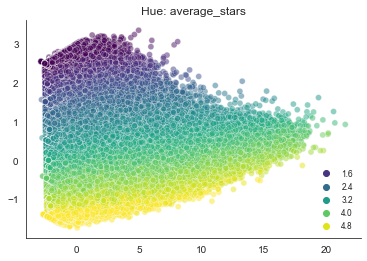

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize if the factors describe the inputs
hue = 'average_stars'
viridis = sns.color_palette('viridis', as_cmap=True)
sns.set_style('white')
sns.scatterplot(x=factors.T[0], y=factors.T[1], hue=inputs[hue], palette=viridis, alpha=0.5)
plt.legend(loc=4, frameon=False, fontsize='small'); plt.title(f'Hue: {hue}')
sns.despine(); plt.savefig('figures/user_vectors.png', dpi=200)
plt.show()